# Sieci neuronowe z wykorzystaniem Kerasa (1)
## Głębokie uczenie

# 1. Podstawy


**Zanim przejdziemy do bardziej zaawansowanego przykładu, zapoznamy się z Tensorflow i Keras. Przyjrzymy się pierwszemu konkretnemu przykładowi sieci neuronowej, która wykorzystuje bibliotekę Python Keras do nauki klasyfikacji odręcznie pisanych cyfr.**

Problemem, który staramy się rozwiązać, jest klasyfikacja obrazów pogrubiony tekstodręcznych cyfr w skali szarości (28 pikseli na 28 pikseli) do 10 kategorii (od 0 do 9). Zbiór danych, którego użyjemy to MNIST. Jest to zestaw 60 000 obrazów treningowych plus 10 000 obrazów testowych, zebranych przez National Institute of Standards and Technology (NIST w MNIST) w latach 80-tych.

Możesz myśleć o "rozwiązywaniu" MNIST jako o "Hello World" głębokiego uczenia się - to jest to, co robisz, aby sprawdzić, czy twoje algorytmy działają zgodnie z oczekiwaniami.

Po pierwsze, zaimportujemy Keras (w oparciu o wersję Python/Tensorflow):

In [1]:
import tensorflow as tf
from tensorflow import keras

Jeśli korzystasz z najnowszej wersji Tensorflow (keras jest już dołączony), dodaj dodatkową funkcjonalność za pomocą:

```
from tensorflow import keras
from tensorflow.keras import XXX
```

Zbiór danych MNIST jest wstępnie załadowany do Keras w postaci zestawu czterech tablic Numpy:

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

**Zadanie 1**

*   Sprawdź liczbę przykładów treningowych i testowych.

In [3]:
train_images.shape[0]

60000

In [4]:
test_images.shape[0]

10000

*   Ile mamy etykiet?

In [5]:
train_labels.shape[0]

60000

In [6]:
test_labels.shape[0]

10000

*   Sprawdź rozmiar obrazu i wykreśl kilka przykładów


In [7]:
train_images.shape[1:]

(28, 28)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

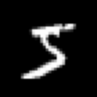

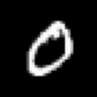

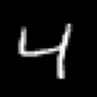

In [9]:
kilka = 3
for i in range(kilka):
    fig, ax = plt.subplots(figsize=(1, 1), facecolor='black')
    ax.imshow(train_images[i], cmap='gray', vmin=0, vmax=255)
    ax.axis('off')
    plt.show()

**Przepływ pracy DNN**
1. Tworzenie architektury sieci neuronowej.
2. Trenuj naszą sieć neuronową za pomocą danych treningowych, train_images i train_labels. Następnie sieć nauczy się kojarzyć obrazy i etykiety.
3. Sieć wygeneruje prognozy dla test_images i sprawdzimy, czy te prognozy są zgodne z etykietami z test_labels.  
  
**Architektura DNN**
1. Nasza sieć będzie składać się z sekwencji dwóch warstw `Dense`, które są gęsto połączonymi (zwanymi również "w pełni połączonymi") warstwami neuronowymi.
2. Druga (i ostatnia) warstwa to 10-kierunkowa warstwa "softmax", co oznacza, że zwróci ona tablicę 10 wyników prawdopodobieństwa (sumujących się do 1). Każdy wynik będzie prawdopodobieństwem, że bieżący obraz cyfry należy do jednej z naszych 10 klas cyfr.

Trening DNN
Aby nasza sieć była gotowa do treningu, musimy wybrać jeszcze trzy elementy w ramach etapu "kompilacji":
1. **Funkcja straty**: Jest to sposób, w jaki sieć będzie w stanie zmierzyć, jak dobrze radzi sobie z danymi treningowymi, a tym samym, w jaki sposób będzie w stanie iść we właściwym kierunku.
2. **Optymalizator**: jest to mechanizm, za pomocą którego sieć będzie się aktualizować w oparciu o dane, które widzi i funkcję strat.
3. **Metryki**: do monitorowania podczas szkolenia i testowania. Tutaj będziemy dbać tylko o `dokładność` (ułamek obrazów, które zostały poprawnie sklasyfikowane).

Dzisiaj, podczas naszych 3 przykładów, będziemy używać tylko klasy Sequential. Podczas naszych następnych spotkań przedstawię funkcjonalne API, w którym będziemy mogli manipulować tensorami danych przetwarzanymi przez model i stosować warstwy do tych tensorów tak, jakby były funkcjami.


**Architektura sieci**

In [10]:
from tensorflow.keras import models, layers
network = models.Sequential()
network.add(layers.Input(shape=(train_images.shape[1]**2,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

**Trening sieci**

Po zdefiniowaniu architektury modelu proces uczenia można skonfigurować na etapie kompilacji. Określamy: optymalizator, funkcję straty i metryki.

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Przygotowanie danych**

Przed treningiem wstępnie przetworzymy nasze dane, przekształcając je w kształt oczekiwany przez sieć i skalując tak, aby wszystkie wartości mieściły się w przedziale [0, 1].

Nasze obrazy treningowe są przechowywane w tablicy o kształcie (60000, 28, 28) typu uint8 z wartościami w przedziale [0, 255].

Przekształć je w tablicę float32 typu shape (60000, 28 * 28) z wartościami od 0 do 1.
Niezbędne funkcje: `reshape` i `astype`.

**Wykonaj to zarówno dla przykładów treningowych, jak i testowych.**

In [12]:
train_images_reshaped = train_images.reshape((60_000, 28*28)).astype(np.float32)/255.0

In [13]:
test_images_reshaped = test_images.reshape((10_000, 28*28)).astype(np.float32)/255.0

Ponieważ używamy funkcji straty `categorical_crossentropy`, musimy przekonwertować format danych:

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Dopasowanie modelu**

Aby wytrenować naszą sieć, wywołujemy metodę dopasowania sieci z parametrami epochs i batch_size. Ustawmy epochs na 5, a batch_size na 128.

In [15]:
#TODO: naprawic
network.fit(train_images_reshaped, train_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8744 - loss: 0.4333
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1204
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0739
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0365


**Ocena sieci/Ewaluacja**

Podczas treningu wyświetlane są dwie wielkości: "strata" sieci na danych szkoleniowych oraz dokładność sieci na danych szkoleniowych.
Szybko osiągamy dokładność 0,989 (tj. 98,9%) na danych treningowych.

Teraz sprawdźmy, czy nasz model działa dobrze również na zestawie testowym:

In [18]:
test_loss, test_acc = network.evaluate(test_images_reshaped, test_labels)

print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9754 - loss: 0.0747
test_acc: 0.979200005531311


Dokładność naszego zestawu testowego okazuje się wynosić 97,8% - to znacznie mniej niż dokładność zestawu treningowego.
Ta różnica między dokładnością treningu a dokładnością testu jest przykładem "**nadmiernego dopasowania**", czyli faktu, że modele uczenia maszynowego mają tendencję do osiągania gorszych wyników na nowych danych niż na danych treningowych.
